In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from focal import Focal, focal_to_spike, spike_trains_to_images_g
from scipy.signal import convolve2d

def todict(np_file):
    d = {}
    for k in list(np_file.keys()):
        try:
            d[k] = np_file[k].item()
        except:
            d[k] = np_file[k]
    return d

def ssa_to_img(ssa, scale, img_shape):
    h, w = img_shape
    n_per_scale = h * w
    start = scale * n_per_scale
    end = start + n_per_scale
    img = np.zeros(img_shape)
    for pix, neuron in enumerate(range(start, end)):
        n_spikes = len(ssa[neuron])
        if n_spikes > 0:
#             print(pix, pix//w, pix%w, neuron, n_spikes)
            img[pix//w, pix%w] = n_spikes
    
    return img
        

Loaded correlations from file


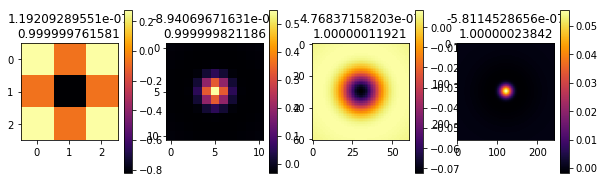

In [7]:
fcl = Focal()
kernels = fcl.kernels.full_kernels
fig = plt.figure(figsize=(10, 3))
for k in kernels:
    ax = plt.subplot(1, 4, k+1)
    ax.set_title("{}\n{}".format(np.sum(kernels[k]), np.sum(kernels[k]**2)))
    
    im = plt.imshow(kernels[k], cmap='inferno')
    plt.colorbar(im)
plt.show()
    

In [8]:
dir_name = "./cifar10_spike_files/class_000001"
files = glob.glob(os.path.join(dir_name, '*'))
print(len(files))

16


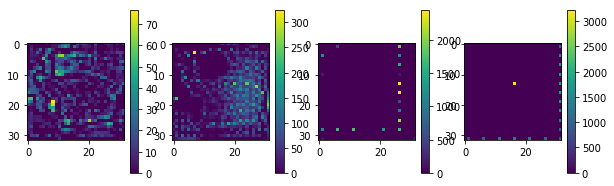

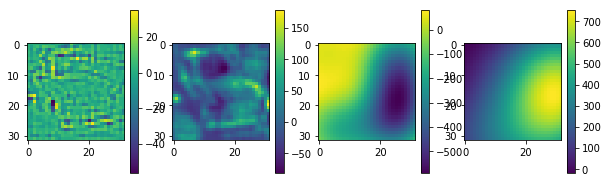

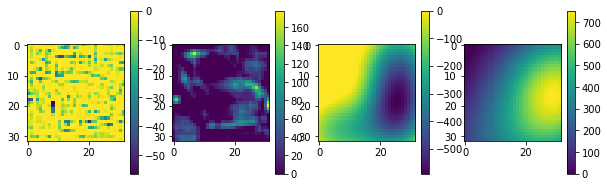

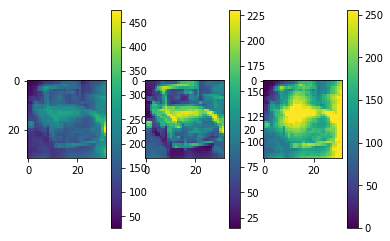

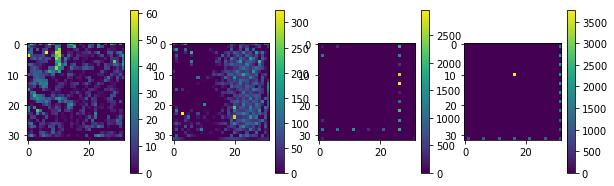

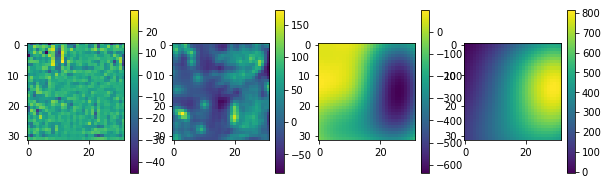

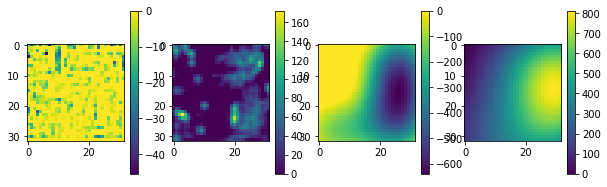

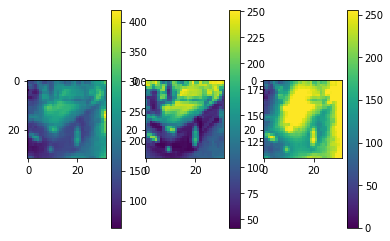

In [12]:
spikes = []
fw = 3.
for f in files[-2:]:
    data = todict(np.load(f, allow_pickle=True))
    shape = data['grayscale_image'].shape

    spikes[:] = data['focal_spikes']
    images = spike_trains_to_images_g(spikes, data['grayscale_image'])
    fig = plt.figure(figsize=(10, 3))
    for i in images:
        k = images[i]
        ax = plt.subplot(1, 4, i+1)
        im = plt.imshow(k)
        plt.colorbar(im)

    conv_images = [
        convolve2d(images[k], kernels[k], mode='same')
        for k in images
    ]
    clipped_imgs = []
    fig = plt.figure(figsize=(10, 3))
    for i, k in enumerate(conv_images):
        upper = np.inf if i in [1, 3] else 0.0
        lower = 0.0 if i in [1, 3] else -np.inf
        clipped_imgs.append(np.clip(k, lower, upper))
        ax = plt.subplot(1, 4, i+1)
        im = plt.imshow(k)
        plt.colorbar(im)    

    fig = plt.figure(figsize=(10, 3))
    for i, k in enumerate(clipped_imgs):
        ax = plt.subplot(1, 4, i+1)
        im = plt.imshow(k)
        plt.colorbar(im)    
    
    s = np.sum(conv_images, axis=0)
    c = np.sum(clipped_imgs, axis=0)
#     s[:, -1] = 0
#     s[:, 0] = 0
#     s[-1, :] = 0
#     s[0, :] = 0
#     min_s = np.min(s)
#     if min_s < 0:
#         s += np.min(s)
#     s = np.clip(s, 0, 255)
    plt.figure()
    ax = plt.subplot(1, 3, 1)
    im = plt.imshow(s)
    plt.colorbar(im)
    
    ax = plt.subplot(1, 3, 2)
    im = plt.imshow(data['grayscale_image'])
    plt.colorbar(im)

    ax = plt.subplot(1, 3, 3)
    im = plt.imshow(np.clip(c, 0, 255))
    plt.colorbar(im)

    plt.show()
    


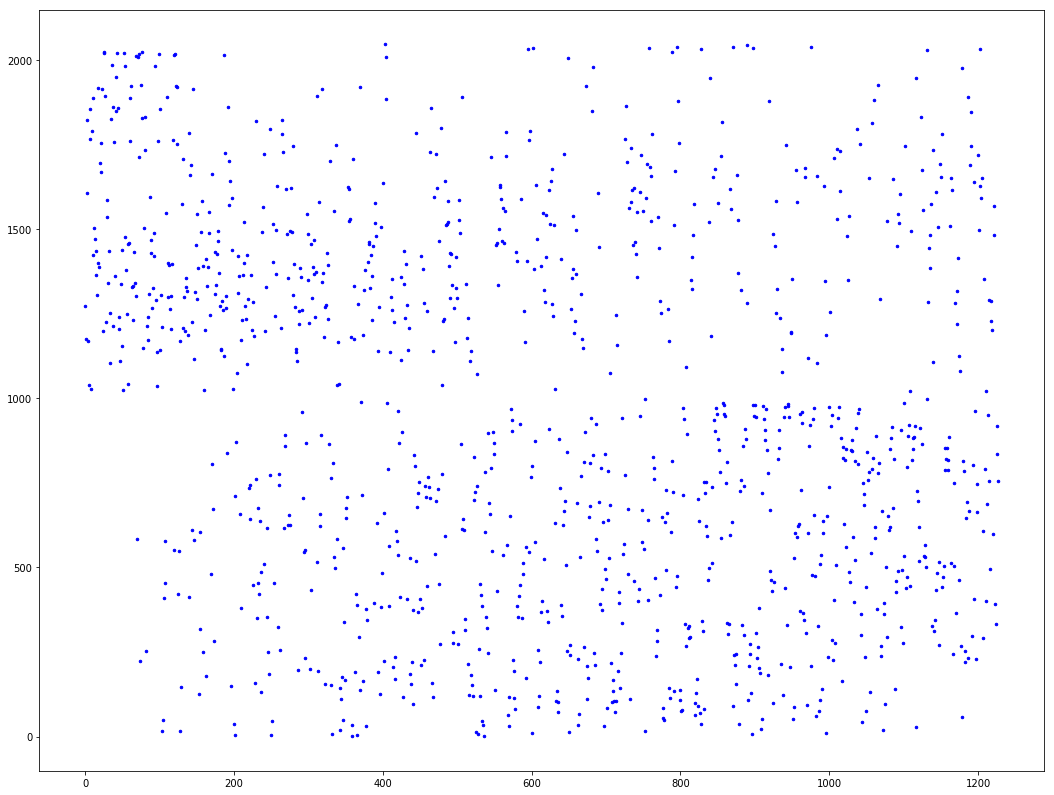

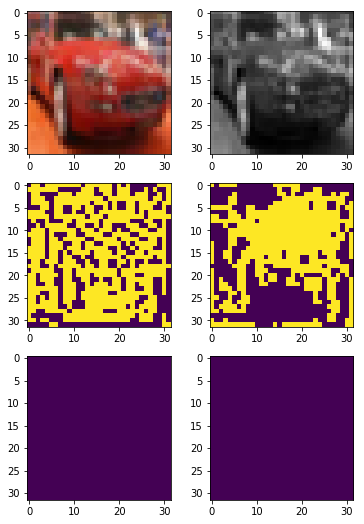

In [15]:
ssa = []
fw = 3.
for f in files[-1:]:
    data = todict(np.load(f, allow_pickle=True))
    ssa[:] = data['spike_source_array']
    
    plt.figure(figsize=(18, 14))
    for i, times in enumerate(ssa):
        if len(times):
            plt.plot(times, i*np.ones_like(times), '.b', markersize=5)
    plt.show()
    
    fig = plt.figure(figsize=(fw*2, fw*3))
    ax = plt.subplot(3, 2, 1)
    plt.imshow(data['color_image'].astype('uint8'))
    ax = plt.subplot(3, 2, 2)
    plt.imshow(data['grayscale_image'].astype('uint8'), cmap='gray')
    shape = data['grayscale_image'].shape
    
    for scale in range(4):
        ax = plt.subplot(3, 2, 3 + scale)
        plt.imshow(ssa_to_img(ssa, scale, shape))
        
    plt.show()
#     im = plt.matshow()

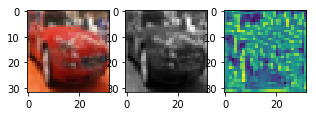

In [16]:
ssa = []
fw = 5.
for f in files[-1:]:
    data = todict(np.load(f, allow_pickle=True))
    ssa[:] = data['spike_source_array']
    
    spike_images = [
        ssa_to_img(ssa, scale, shape) for scale in range(4)
    ]

    conv_images = [
        convolve2d(spike_images[scale], kernels[scale], mode='same')
        for scale in range(4)
    ]
    
    out = np.sum(conv_images, axis=0)
    
    fig = plt.figure(figsize=(fw*1, fw*3))
    ax = plt.subplot(1, 3, 1)
    plt.imshow(data['color_image'].astype('uint8'))
    ax = plt.subplot(1, 3, 2)
    plt.imshow(data['grayscale_image'].astype('uint8'), cmap='gray')
    
    ax = plt.subplot(1, 3, 3)
    plt.imshow(out)
    
    
    plt.show()
#     im = plt.matshow()